## Lab4

### 1. State the difference and similarity of GD and SGD, give each two situitions, one should use GD, the other should use SGD. Explain why. (10)

**answer**: Both Gradient Descent (GD) and Stochastic Gradient Descent (SGD) aim to minimize the cost function by iteratively adjusting model parameters to obtain optimal values. They both take large steps from initial gusses and reduce their step size once they get closer to an optimal value for a model parameter. GD computes the gradient using the entire dataset in each iteration which makes it suitable for more smaller datasets. However, SGD, updates and adjusts parmeters in smaller selected batches making it faster and not as computationally expensive for larger datasets.  

Two situations to use GD:
- when the dataset is relatively small
- when computational resources are not a significant constraint
  
Two situiations to use SGD:
- when the dataset is very large
- where new data is coming in quickly and continuously being updated (since SGD can quickly adjust parameters for new additions to the data)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
STAB = pd.read_csv("smart_grid_stability_augmented.csv")
STAB = STAB.drop('stab', axis = 1)
STAB.head(5)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


### 2. Seperate the STAB dataset to train and test, stabf is y, the others are x, make test dataset 30% of the total dataset (10)

In [3]:
X = STAB.drop(columns=['stabf'])
y = STAB['stabf']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 3. Apply Random Forest to this dataset, predict stabf, show the accuracy. (10)

In [4]:
STAB_rf = RandomForestClassifier()
STAB_rf.fit(X_train, y_train)

rf_pred = STAB_rf.predict(X_test)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

      stable       0.94      0.91      0.92      6522
    unstable       0.95      0.97      0.96     11478

    accuracy                           0.95     18000
   macro avg       0.94      0.94      0.94     18000
weighted avg       0.95      0.95      0.95     18000



### 4. Apply SVM to this dataset, predict stabf, show the accuracy. (10)

In [5]:
STAB_svm = svm.SVC()
STAB_svm.fit(X_train, y_train)

svm_pred = STAB_svm.predict(X_test)
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

      stable       0.92      0.88      0.90      6522
    unstable       0.93      0.96      0.94     11478

    accuracy                           0.93     18000
   macro avg       0.93      0.92      0.92     18000
weighted avg       0.93      0.93      0.93     18000



In [6]:
wine = pd.read_csv("Wine.csv")
wine.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [7]:
X=wine.drop("Customer_Segment",axis=1).values
y=wine["Customer_Segment"].values

### 5. Standartize the variables X (10)

In [8]:
from sklearn.preprocessing import StandardScaler

X_standardized = StandardScaler().fit_transform(X)

### 6. Use PCA to reduce standartized X to 2 dimensions (10)

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)
X_pca.shape

(178, 2)

### 7. Use LDA to reduce standartized X to 2 dimensions (10)

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_standardized, y)
X_lda.shape

(178, 2)

### 8. Apply logistic regression to standartized X, PCA X and LDA X to predict Y, compare the result. Remember to split train and test sets. Set test sets to 20% of whole data. (10)

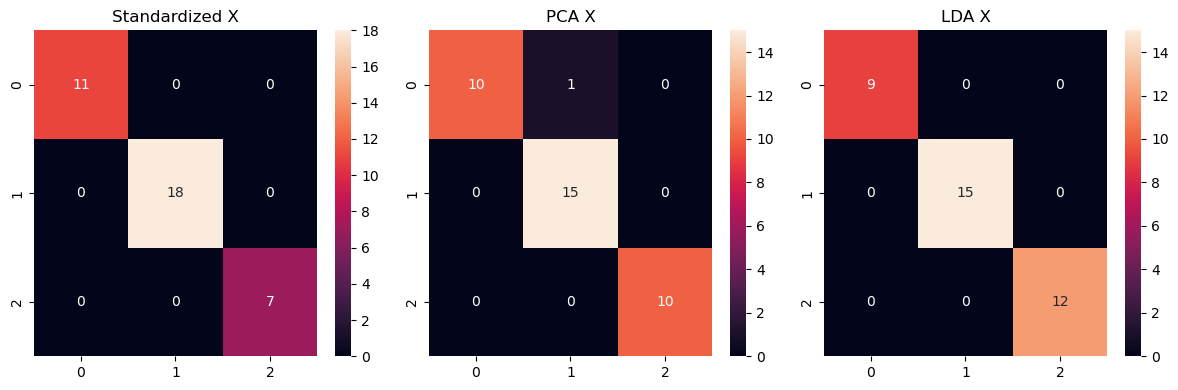

standardized X classification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00         7

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

PCA X classification report:
               precision    recall  f1-score   support

           1       1.00      0.91      0.95        11
           2       0.94      1.00      0.97        15
           3       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

LDA X classification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1

In [11]:
from sklearn.linear_model import LogisticRegression

std_X_train, std_X_test, std_y_train, std_y_test = train_test_split(X_standardized, y, test_size=0.20)
bc_X_std = LogisticRegression()
bc_X_std.fit(std_X_train, std_y_train)
bc_X_std_pred = bc_X_std.predict(std_X_test)
bc_X_std_conf_matrix = confusion_matrix(std_y_test, bc_X_std_pred)

pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(X_pca, y, test_size=0.20)
bc_X_pca = LogisticRegression()
bc_X_pca.fit(pca_X_train, pca_y_train)
bc_X_pca_pred = bc_X_pca.predict(pca_X_test)
bc_X_pca_conf_matrix = confusion_matrix(pca_y_test, bc_X_pca_pred)

lda_X_train, lda_X_test, lda_y_train, lda_y_test = train_test_split(X_lda, y, test_size=0.20)
bc_X_lda = LogisticRegression()
bc_X_lda.fit(lda_X_train, lda_y_train)
bc_X_lda_pred = bc_X_lda.predict(lda_X_test)
bc_X_lda_conf_matrix = confusion_matrix(lda_y_test, bc_X_lda_pred)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.heatmap(bc_X_std_conf_matrix, annot=True)
plt.title("Standardized X")

plt.subplot(1, 3, 2)
sns.heatmap(bc_X_pca_conf_matrix, annot=True)
plt.title("PCA X")

plt.subplot(1, 3, 3)
sns.heatmap(bc_X_lda_conf_matrix, annot=True)
plt.title("LDA X")

plt.tight_layout()
plt.show()

print("standardized X classification report:\n", classification_report(std_y_test, bc_X_std_pred))
print("PCA X classification report:\n", classification_report(pca_y_test, bc_X_pca_pred))
print("LDA X classification report:\n", classification_report(lda_y_test, bc_X_lda_pred))

### 9. Apply feature select to the STAB data.(10)

In [13]:
X = STAB.drop(columns=['stabf'])
y = STAB['stabf']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

new_rf = RandomForestClassifier()
new_rf.fit(X_train, y_train)

feat_importances = new_rf.feature_importances_

importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feat_importances
})

importances_df.sort_values(by='Importance', ascending=False).head(10)

,Feature,Importance
0,tau1,0.130290
2,tau3,0.126037
1,tau2,0.126000
3,tau4,0.124865
10,g3,0.101113
8,g1,0.099714
9,g2,0.099497
11,g4,0.098258
4,p1,0.025048
7,p4,0.023241


### 10. Apply SVM to the edited STAB dataset, compare the result with the previous one.(Remember to split the dataset)(10)

In [16]:
from sklearn.metrics import accuracy_score

sel_features = importances_df['Feature'].head(10).tolist()

X_sel = STAB[sel_features]
y_sel = STAB['stabf']

X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_sel, y_sel, test_size=0.3, random_state=42)

svm_sel = svm.SVC()
svm_sel.fit(X_train_sel, y_train_sel)

y_pred_sel = svm_sel.predict(X_test_sel)
print(classification_report(y_test_sel, y_pred_sel))

              precision    recall  f1-score   support

      stable       0.81      0.73      0.77      6522
    unstable       0.85      0.90      0.88     11478

    accuracy                           0.84     18000
   macro avg       0.83      0.82      0.82     18000
weighted avg       0.84      0.84      0.84     18000



New SVM model seems to have a slightly lower accuracy compared to the previous one.